In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

In [2]:
Save = True

0
100
200
300
400
500
600
700
800
900


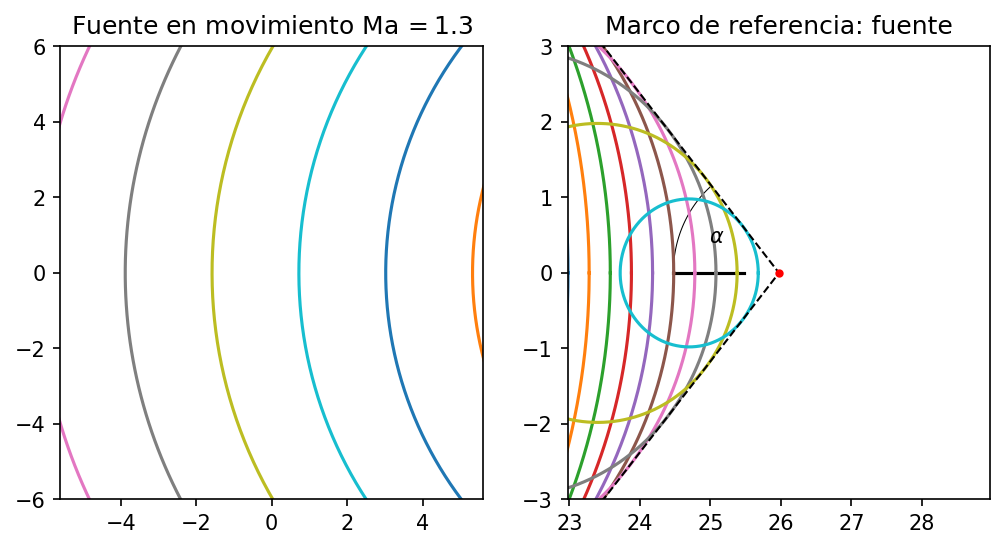

In [3]:
fig4 = plt.figure(figsize=(8,4),dpi=150)
ax4  = fig4.add_subplot(121)
ax42  = fig4.add_subplot(122)

p = [0,0]

theta = np.linspace(0,2*np.pi,1000)
x = np.cos(theta)
y = np.sin(theta)

linep, = ax4.plot(0*x,0*y,color='C0')
vector_line3 = [[0,linep,[0,0]]] # tiempo inicial, linea, centro

linep, = ax42.plot(0*x,0*y,color='C0')
vector_line32 = [[0,linep,[0,0]]] # tiempo inicial, linea, centro


# text_t4 = ax4.text(5,-6,r'$t/c = %.2f$'%0,ha='right',va='bottom')

deltat = 0.02
step_pulse = int(1/deltat)

pulse_count = 1

vel_fuente = [1.3,0] # V/c

point4, = ax4.plot(0,0,'.',color='red',zorder=20)
point42, = ax42.plot(0,0,'.',color='red',zorder=20)


alpha = np.arcsin(1/vel_fuente[0])

CA = 3
CO = CA*np.tan(alpha)

line_tan4, = ax42.plot([-3,0,-3],[-CO,0,CO],'k--',linewidth=1,zorder=15)
line_hor,  = ax42.plot([-1.5,-0.5],[0,0],color='black')

rcircle = 1.5
circlex = rcircle*np.cos(np.linspace(np.pi,np.pi-alpha))
circley = rcircle*np.sin(np.linspace(np.pi,np.pi-alpha))

circle, = ax42.plot(circlex,circley,color='black',linewidth=0.5)
text_circle= ax42.text(-1,0.4,r'$\alpha$')
    
def update4(t_int):
    t = deltat*t_int

#     text_t4.set_text(r'$t/c = %.2f$'%t)
    
    point4.set_data([vel_fuente[0]*t,vel_fuente[1]*t])
    point42.set_data([vel_fuente[0]*t,vel_fuente[1]*t])
    line_tan4.set_xdata([-3+vel_fuente[0]*t,vel_fuente[0]*t,-3+vel_fuente[0]*t])
    line_hor.set_xdata([-1.5+vel_fuente[0]*t,-0.5+vel_fuente[0]*t])
    
    text_circle.set_position([-1+vel_fuente[0]*t,0.4])
    circle.set_xdata(circlex+vel_fuente[0]*t)
    if t_int>0 and t_int%step_pulse==0:
        centro = [vel_fuente[0]*t,vel_fuente[1]*t]
        pulse_count = t_int//step_pulse
        
        linep_n, = ax4.plot(x+centro[0],y+centro[0],color='C'+str(pulse_count%10))
        vector_line3.append([t,linep_n,centro])
        
        linep_n, = ax42.plot(x+centro[0],y+centro[0],color='C'+str(pulse_count%10))
        vector_line32.append([t,linep_n,centro])
        
    for i in range(len(vector_line3)):
        r_new = t-vector_line3[i][0]
        centro = vector_line3[i][2]
        
        vector_line3[i][1].set_xdata(r_new*x+centro[0])
        vector_line3[i][1].set_ydata(r_new*y+centro[1])
        
        vector_line32[i][1].set_xdata(r_new*x+centro[0])
        vector_line32[i][1].set_ydata(r_new*y+centro[1])
        
        

    ax42.set_xlim([-3+t*vel_fuente[0],3+t*vel_fuente[0]])
    if Save:
            plt.savefig('pulso_supersonico%06d.png'%t_int)  

# ax4.set_xlim([-3,3])
# ax4.set_ylim([-3,3])


play4 = widgets.Play(
    value=0,
    min=0,
    max=1000,
    step=1,
    interval=80,
    description="Press play",
    disabled=False
)

ax4.axis('equal')

ax4.set_xlim(-6,6)
ax4.set_ylim(-6,6)
ax42.set_ylim(-3,3)

if not Save:
    widgets.interact(update4,t_int=play4)
ax4.set_title('Fuente en movimiento $\operatorname{Ma}=%.1f $'%vel_fuente[0]) ;
ax42.set_title('Marco de referencia: fuente') ;

if Save:   
    for i in range(1000):
        if i%100==0:
            print(i)
        update4(i)

# mp4 (ubuntu)

ffmpeg -framerate 30 -pattern_type glob -i 'pulso_supersonico*.png'   -c:v libx264 -pix_fmt yuv420p pulso_supersonico.mp4